# Pytorch加载数据集

## 1.预定义的 Dataset

In [ ]:
from torchvision import datasets, transforms
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # 调整图像大小
    transforms.ToTensor(),  # 转换为张量，并归一化到 [0, 1]
])
# 下载并加载 MNIST 数据集
transform = transforms.ToTensor()  # 将图像转换为张量
mnist_dataset = datasets.MNIST(root='./mnist', train=True, transform=transform, download=True)

# 查看数据集大小
print(len(mnist_dataset))

# 访问第一个样本
image, label = mnist_dataset[0]
print(image.shape, label)


In [ ]:
dataset_classes = [name for name in dir(datasets) if isinstance(getattr(datasets, name), type)]

print("torchvision.datasets 提供的数据集类:")
for dataset_class in dataset_classes:
    print(dataset_class)

In [ ]:
from torchvision.datasets import ImageFolder
train_dataset = datasets.ImageFolder(root='data/train', transform=transform)
val_dataset = datasets.ImageFolder(root='data/val', transform=transform)


## 2.自定义 Dataset

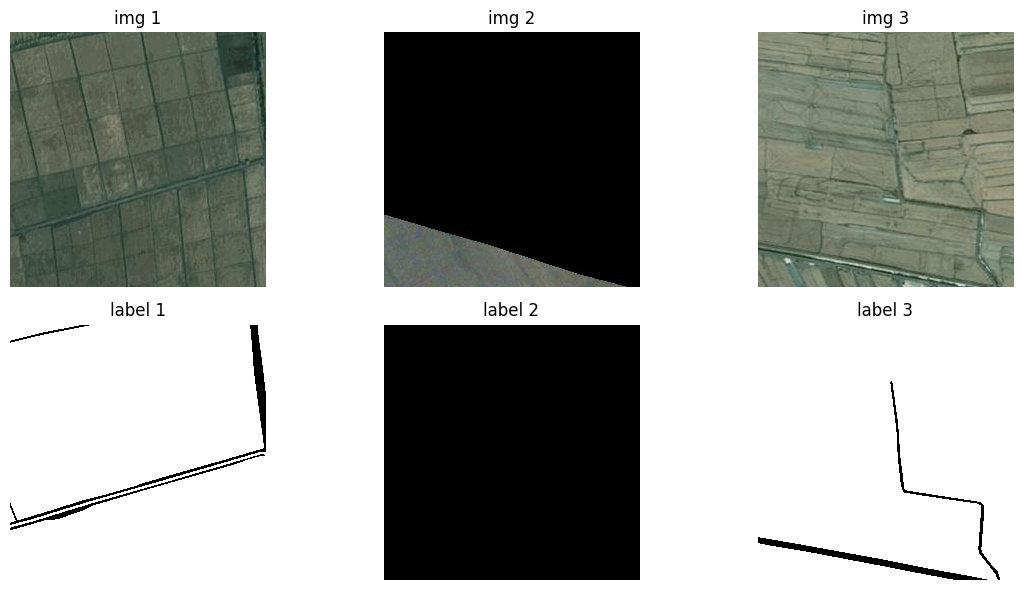

In [10]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np

class SegmentationDataset(Dataset):
    def __init__(self, img_dir, label_dir, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.img_names = os.listdir(img_dir)  # 获取图像文件名

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_name = self.img_names[idx] # idx = 0
        img_path = os.path.join(self.img_dir, img_name)
        
        label_name = os.path.splitext(img_name)[0] + ".png"
        label_path = os.path.join(self.label_dir, label_name)

        # 加载图片和标签
        image = Image.open(img_path).convert("RGB")  # 转换为 RGB 图像
        label = Image.open(label_path).convert("L")  # 转换为单通道图像

        if self.transform:
            image = self.transform(image)
            label = torch.tensor(np.array(label), dtype=torch.long)  # 转换为张量
        
        return image, label

    
import numpy as np
from torchvision.transforms import Compose

from torch.utils.data import DataLoader
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # 调整图像大小
    transforms.ToTensor(),  # 转换为张量，并归一化到 [0, 1]
])
# 数据文件夹路径
img_dir = "train_and_label/img"
label_dir = "train_and_label/label"

# 创建数据集
dataset = SegmentationDataset(img_dir=img_dir, label_dir=label_dir, transform=transform)

# 创建 DataLoader
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

import matplotlib.pyplot as plt

def visualize_batch(images, labels, num_samples=4):
  
    # 确保不超过批次大小
    num_samples = min(num_samples, images.shape[0])
    
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        # 显示原始图像
        plt.subplot(2, num_samples, i + 1)
        img = images[i].permute(1, 2, 0)  # 转换为(H, W, C)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'img {i+1}')
        
        # 显示标签
        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(labels[i], cmap='gray')
        plt.axis('off')
        plt.title(f'label {i+1}')
    
    plt.tight_layout()
    plt.show()

# 使用方法：
for images, labels in dataloader:
    visualize_batch(images, labels)
    break  # 只显示第一个批次

In [5]:
import os
path = os.listdir("train_and_label/img")
print(path)

['T000002.jpg', 'T000003.jpg', 'T000000.jpg']


In [7]:
path[1]

'T000003.jpg'